In [1]:
import sys
sys.path.append('../')

import matplotlib.pyplot as plt
from porousmedialab.batch import Batch
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
tend = 0.05
dt = 0.0001
phi=0.5

In [3]:
bl = Batch(tend, dt)

In [4]:
C_init=0.0001/3
bl.add_species(name='H2CO3', init_conc=0)
bl.add_species(name='HCO3', init_conc=0)
bl.add_species(name='CO3', init_conc=0)

bl.add_acid(species=['H2CO3', 'HCO3', 'CO3'], pKa=[3.6, 10.32])

bl.add_species(name='Ca', init_conc=0)
bl.add_species(name='CaCO3', init_conc=0)


bl.add_ion(name='Ca', charge=2)

In [5]:
bl.constants['Ks_CaCO3'] = 3.3e-9
bl.constants['k_pre'] = 1e-2
bl.constants['k_dis'] = 1e-1

In [6]:
bl.rates['R_pre_CaCO3'] = 'k_pre * (Ca*CO3/Ks_CaCO3-1)'
bl.rates['R_dis_CaCO3'] = 'k_dis * CaCO3 * (1 - Ca*CO3/Ks_CaCO3)'

In [7]:
bl.dcdt['CaCO3'] = 'R_pre_CaCO3 - R_dis_CaCO3'
bl.dcdt['Ca'] = '-R_pre_CaCO3 + R_dis_CaCO3  +1e-2'
bl.dcdt['CO3'] = '-R_pre_CaCO3 + R_dis_CaCO3 +1e-2'

In [8]:
bl.solve()

Simulation started:
	 2020-07-02 20:09:26


Estimated time of the code execution:
	 0h:00m:02s
Will finish approx.:
	 2020-07-02 20:09:28


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


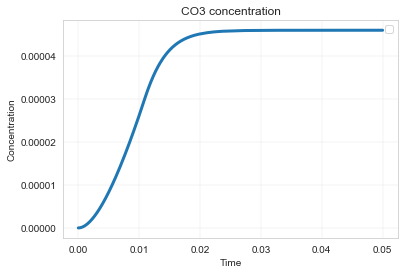

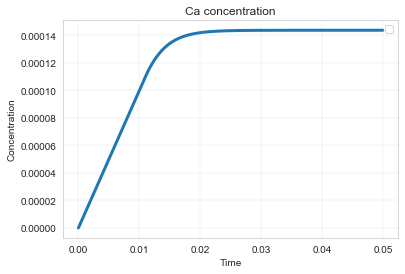

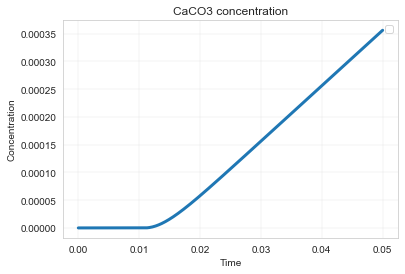

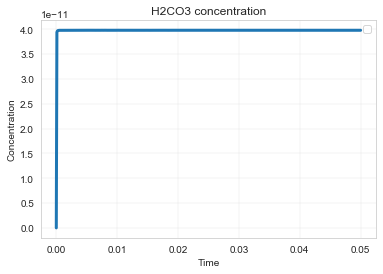

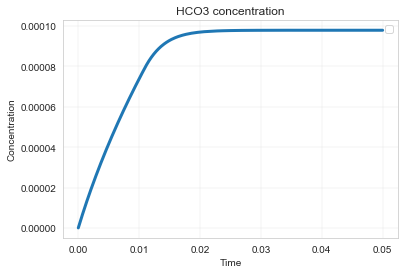

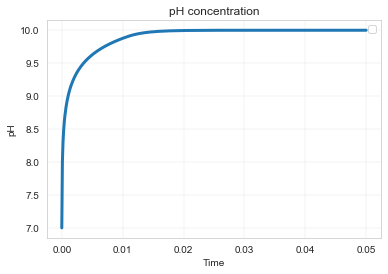

In [9]:
bl.plot_profiles()

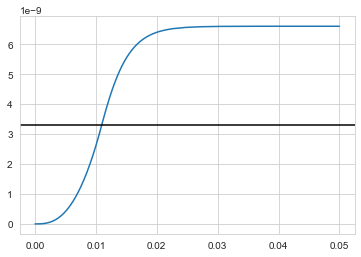

In [10]:
plt.plot(bl.time, bl.CO3['concentration'][0]*bl.Ca['concentration'][0])
plt.axhline(bl.constants['Ks_CaCO3'], c='k')

In [11]:
bl.reconstruct_rates()

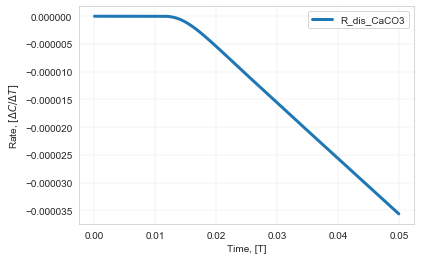

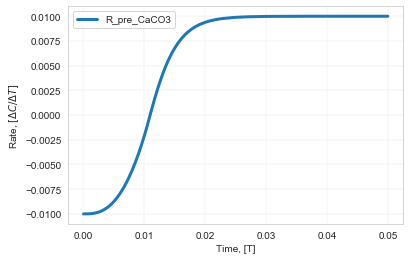

In [12]:
bl.plot_rates()